# Simple MDP Design
Grzegorz Malisz
Student Number: 4852370
[GitHub Repository](https://github.com/grzgm/deth)

In [13]:
import random
from math import isclose
import copy
from IPython.display import Image

## Assignment 1

### MDP definition ver 1
A set of states $S$: continuous or discrete
A set of actions $A$: continuous or discrete
A set of rewards $R$: continuous or discrete
For each state $s \in S$ there are permitted actions $a \in A(s)$
Transition Probabilities: $p(s_{t+1}, r_{t+1}|s_t, a_t)$

With this version we can calculate the probability of moving to certain state $s_{t+1}$ and acquiring reward $r_{t+1}$, given that we are in the state $s_t$ and do action $a_t$.

### MDP definition ver 2
A set of states $S$: continuous or discrete
A set of actions $A$: continuous or discrete
A set of rewards $R$: continuous or discrete
For each state $s \in S$ there are permitted actions $a \in A(s)$
Transition Probabilities: $p(s_{t+1}|s_t, a_t)$
Deterministic function of $r_{t+1} = f(s_t, s_{t+1}, a_t)$

With this version we can calculate the probability of moving to certain state $s_{t+1}$, given that we are in the state $s_t$ and do action $a_t$. And we can also calculate the reward $r_{t+1}$ from performing $a_t$ in $s_{t+1}$ and finishing in $s_t$.

### Assignment 1.1: MDP ver1 vs ver2
The most notable difference between those two definitions is the fact that ver 1 calculates already possibility of ending up in $s_{t+1}, r_{t+1}$, while ver 2 calculates first probability of ending up in the $s_{t+1}$, and then we can get the deterministic function to calculate the expected reward $r_{t+1}$. Also the ver 2 does not work with a stochastic reward system, by that I mean that for ver 2 to work for every $s_{t+1}, s_t, a_t$ there is deterministic reward $r_{t+1}$

### Assignment 1.2: generic stochastic MDP
This Python Class for generic MDP implements formal definition of MDP ver 2 (states, actions, rewards, permitted actions, transition probabilities, reward function). Variables below are added to illustrate the behaviour of MDP. Permitted actions are solved by using the input (`transition_probabilities`, `rewards`) that consist only of permitted actions and `lookup_transition_probability`, `lookup_reward` functions which in case of forbidden action return adequate value. In addition, for next assignments `start_state`, `terminal_states` and `random_termination` were implemented. The structure of variables will be shown in next assignments.

In [14]:
def __init__(self, states, actions, transition_probabilities, rewards, start_state, gamma=0.9,
             eps=1e6, random_termination=0.0, cost_of_living=0.0):
    self.states = states
    self.actions = actions
    self.transition_probabilities = transition_probabilities
    self.inspect_probabilities()
    self.rewards = rewards
    self.start_state = start_state
    self.gamma = gamma
    self.eps = eps
    self.random_termination = random_termination
    assert 0 <= self.random_termination <= 1
    self.cost_of_living = cost_of_living

    self.value = {}
    for state in states:
        self.value[state] = 0.0

    # def reset(self):
    #     for state in self.states:
    #         self.value[state] = 0.0

    def lookup_transition_probability(self, state: str, action: str, next_state: str):
        return self.transition_probabilities[state].get(action, {}).get(next_state, 0.0)

    def lookup_reward(self, state: str, action: str, next_state: str):
        return self.transition_probabilities[state].get(action, {}).get(next_state, 0)

    def inspect_probabilities(self):
        for state in self.transition_probabilities.values():
            for action in state.values():
                assert isclose(sum(action.values()), 1, abs_tol=1e-4)

    # def value(self, state: str):
    #     pass

    # def action_value(self, state: str, action: str):
    #     next_states = self.transition_probabilities[state].get(action, {})
    #     return sum(self.lookup_transition_probability(state, action, next_state) * (
    #             self.lookup_reward(state, action, next_state) + self.gamma * self.value[next_state]) for next_state
    #                in next_states)
    #
    # def policy_random(self):
    #     return random.choice(self.actions)
    #
    # def estimate_value(self):
    #     for _ in range(int(self.eps)):
    #         for state in self.states:
    #             self.value[state] = self.action_value(state, self.policy_random())

### Assignment 1.3: MDP form image

Code below uses states, actions, rewards, and probabilities form the image. It was a simple rewriting values form the image.

In [15]:
states = ['s0', 's1', 's2']
actions = ['a0', 'a1']

transition_probabilities = {
    's0': {'a0': {'s0': 0.5, 's2': 0.5},
           'a1': {'s2': 1}},
    's1': {'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
           'a1': {'s1': 0.95, 's2': 0.05}},
    's2': {'a0': {'s0': 0.4, 's2': 0.6},
           'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}},
}

rewards = {
    's0': {},
    's1': {'a0': {'s0': 5}},
    's2': {
        'a1': {'s0': -1}},
}

## Assignment 2
Clarification Note:
`is_slippery` is named random_termination, as I believe that it better reflects the purpose of this variable.
Terminal States, are not directly present as for example special array. Terminal states are states that do not have any actions available in them.

### Assignment 2.1
Squares are numbered from 0 to 4. Permitted actions are left (l) and right (r) if they are not transitioning the agent outside of the environment. `random_termination`, `cost_of_living` can be specified by user.

In [16]:
states = ['0', '1', '2', '3', '4']
actions = ['l', 'r']

# Terminal States have no actions
transition_probabilities = {
    '0': {},
    '1': {'l': {'0': 1},
          'r': {'2': 1}},
    '2': {'l': {'1': 1},
          'r': {'3': 1}},
    '3': {'l': {'2': 1},
          'r': {'4': 1}},
    '4': {},
}

rewards = {
    '1': {'l': {'0': -1}},
    '3': {'r': {'4': 1}},
}

mdp = MDP(states, actions, transition_probabilities, rewards, '2', random_termination=0.3, cost_of_living=-1.5)

### Assignment 2.2
States are represented by x and y coordinates on the grid. Actions indicate move on the x or y axis. `transition_probabilities` are generated, as writing them by hand would be waste of time. Rewards follow the same strategy. Bottom states are also implemented. Solution can be scaled for larger grids.

In [17]:
# # print the states
# for y in range(3):
#     for x in range(5):
#         print((x, y), end=", ")
#     print("")

# grid world (x, y)
states = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0),
          (0, 1), (1, 1), (2, 1), (3, 1), (4, 1),
          (0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]
# right, left, up, down
actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

transition_probabilities = {}

# generate transition_probabilities
for state in states:
    transition_probabilities[state] = {}
    for action in actions:
        if 0 <= state[0] + action[0] <= 4 and 0 <= state[1] + action[1] <= 2:
            transition_probabilities[state][action] = {(state[0] + action[0], state[1] + action[1]): 1}

# terminal states
for state in [(1, 2), (2, 2), (3, 2), (4, 2)]:
    transition_probabilities[state] = {}

# same structure for rewards
rewards = copy.deepcopy(transition_probabilities)

for state in rewards:
    amount_of_actions = len(rewards[state])
    for action in rewards[state]:
        for next_state in rewards[state][action]:
            if next_state in [(1, 2), (2, 2), (3, 2)]:
                rewards[state][action][next_state] = -1
            if next_state == (4, 2):
                rewards[state][action][next_state] = 1
            else:
                rewards[state][action][next_state] = 0

# start
start_state = (0, 2)

mdp = MDP(states, actions, transition_probabilities, rewards, start_state, random_termination=0.3,
          cost_of_living=-1.5)

### Assignment 2.3
States are represented by the coordinates x and y and Boolean for recognising if agent obtained the key. Key is obtained by going from (2, 1, False) to (2, 0, True), stating that user obtained the key. In addition, state (2, 0, False) was introduced, although it may seem pointless, this state can be theoretically obtained by agent starting in the (2, 0), and with the rule that "Key is obtained by going to this (key state) state".Transition form the state (3, 1) to (4, 1) is not possible without the key.

In [18]:
# # print the states
# for y in range(3):
#     for x in range(5):
#         for z in [True, False]:
#             print((x, y, z), end=", ")
#     print("")

# grid world (x, y)
# if can start in the key state, but not obtaining the key at the same time
# states = [(2, 0, True), (2, 0, False),
states = [(2, 0, True),
          (0, 1, True), (0, 1, False), (1, 1, True), (1, 1, False), (2, 1, True), (2, 1, False), (3, 1, True),
          (3, 1, False), (4, 1, True)]
# right, left, up, down
actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

transition_probabilities = {}

# generate transition_probabilities
for state in states:
    transition_probabilities[state] = {}
    for action in actions:
        if action[1] == 0 and state[1] == 1 and (state[0] + action[0], state[1] + action[1], state[2]) in states:
            transition_probabilities[state][action] = {(state[0] + action[0], state[1] + action[1], state[2]): 1}

# this depends if we say that key is obtained by going to this state, or being in it
# transition_probabilities[(2, 0, False)][(0, 1)] = {(2, 1, True): 1}

# without the key to the key state
transition_probabilities[(2, 1, False)][(0, -1)] = {(2, 0, True): 1}
# with the key to the key state
transition_probabilities[(2, 1, True)][(0, -1)] = {(2, 0, True): 1}

# from the key state to state lower
transition_probabilities[(2, 0, True)][(0, 1)] = {(2, 1, True): 1}

# transition to the green state
transition_probabilities[(3, 1, True)][(1, 0)] = {(4, 1, True): 1}

# terminal states
transition_probabilities[(0, 1, True)] = {}
transition_probabilities[(0, 1, False)] = {}
transition_probabilities[(4, 1, True)] = {}

# Rewards
rewards = {}

for state in transition_probabilities:
    rewards[state] = {}
    for action in transition_probabilities[state]:
        for next_state in transition_probabilities[state][action]:
            if next_state in [(0, 1, True), (0, 1, False)]:
                rewards[state][action] = {next_state: -1}
            if next_state == (4, 1, True):
                rewards[state][action] = {next_state: 1}

# start
start_state = (0, 2)

mdp = MDP(states, actions, transition_probabilities, rewards, start_state, random_termination=0.3,
          cost_of_living=-1.5)

## Assignment 3

### Assignment 3.1

#### Assignment 3.1.1
For agent with random move policy, he can walk for the eternity, by choosing between for example state $s_1$ and $s_2$. For this reason I have provided the general formulas.

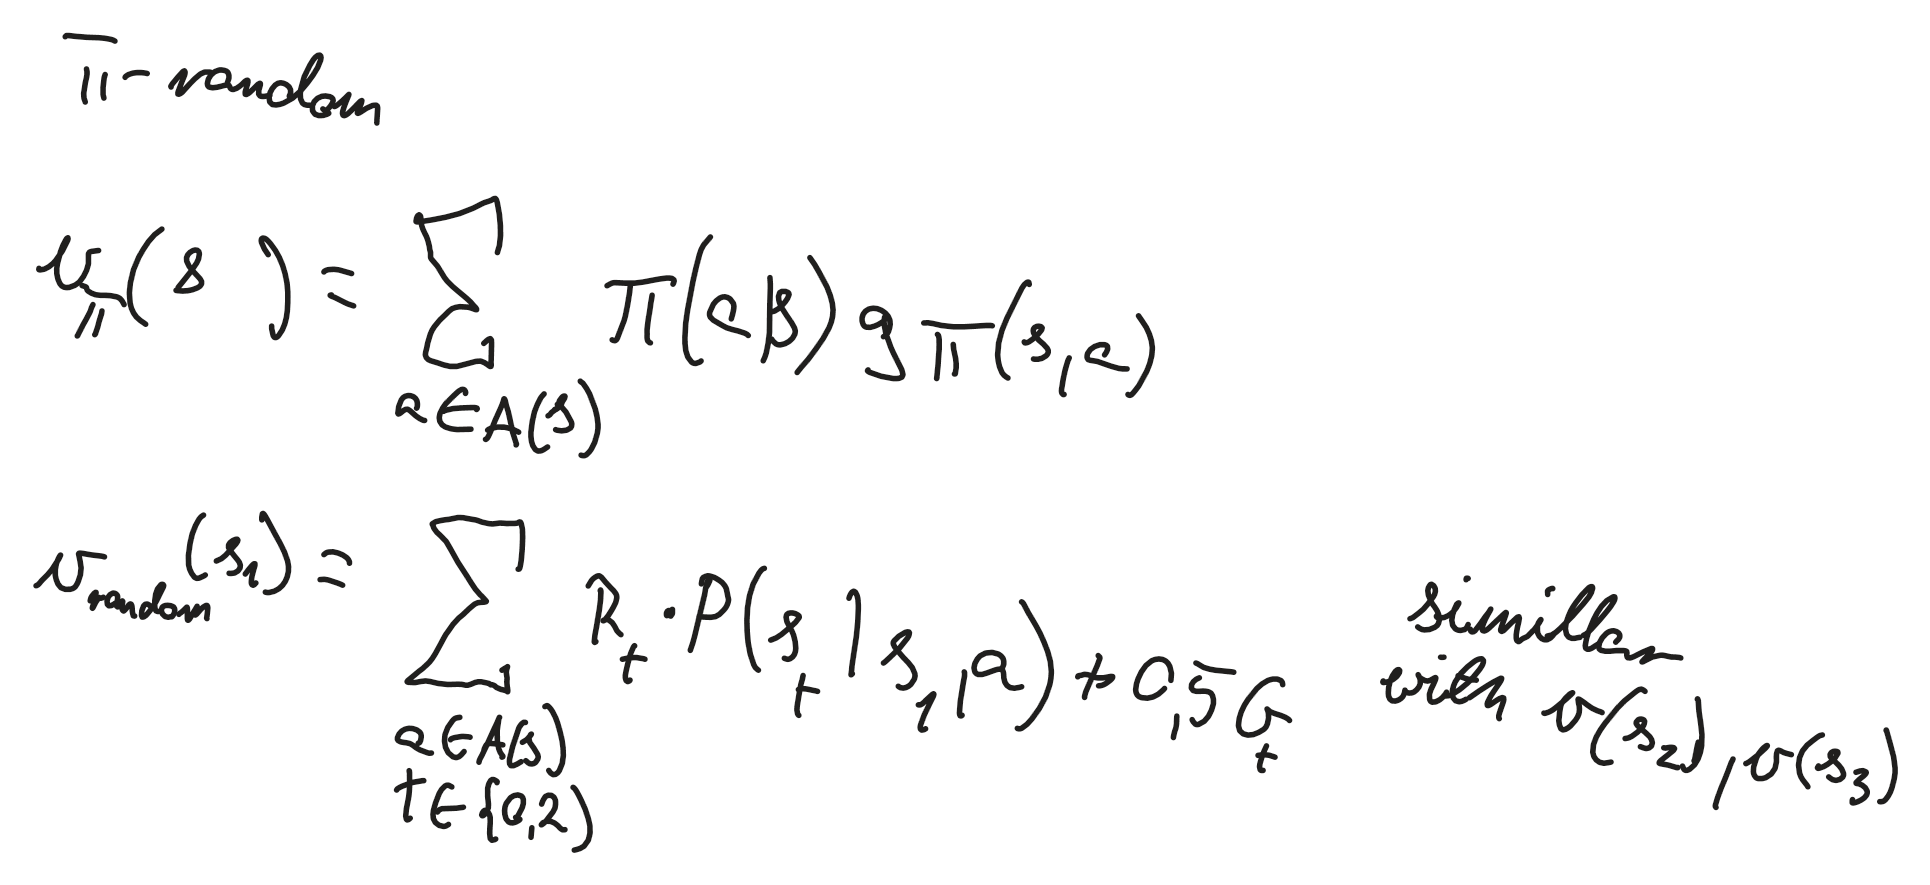

In [19]:
Image(filename='img/3_1_1.png')

#### Assignment 3.1.2
Agent from the states $s_1$, $s_2$, $s_3$ can go to the $s_4$, but if the agent is already in one of the terminal states ($s_0$, $s_4$), he cannot proceed further, but while calculating $v$, from what I understood I omit the terminal states, so this lead to answers below. $s_4$ has 0, as if agent goes to $s_4$, he cannot go from $s_4$ to $s_4$, unless we allow him to stay in place as an action.

In [ ]:
Image(filename='img/3_1_2.png')

## Assignment 3.2

#### Assignment 3.2.1
Cost of living (`-0.1`) should be reduced after every step, rest is similar, like in Assignment 3.1.1

In [ ]:
Image(filename='img/3_2_1.png')

#### Assignment 3.2.2
Cost of living (`-2`) should be reduced after every step, rest is similar, like in Assignment 3.1.1

In [ ]:
Image(filename='img/3_2_2.png')

#### Assignment 3.2.3
For the cost of living `-2` it makes sense for agent to go to the orange state from the leftmost gray position, as it will allow him to get only penalty of `-3` instead of `-5` if he went for the green state.

## Assignment 3.3

#### Assignment 3.3.1
[WIP] Similar, like in Assignment 3.1.1

In [22]:
# Image(filename='img/3_3_1.png')

#### Assignment 3.3.2
[WIP] Similar, like in Assignment 3.1.2

In [23]:
# Image(filename='img/3_3_2.png')

### Assignment 3.4

#### Assignment 3.4.1
If the Agent changes the policy to taking the highest $q$ it will always go for the green state, except for the case with cost of living `-2`. &q$ and $v$ will reflect that by counting returns for agent that tries to get to the green state.

#### Assignment 3.4.2
Yes, I believe that results make sens for the given policies. Here I also consider the general formulas as the result, as counting infinite number of steps would be hard, so given that they make sens.